<a href="https://colab.research.google.com/github/fabioVitorTavares/EFC1-GCC253---Complexidade-e-Projeto-de-Algoritmos/blob/main/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Fábio Vitor Tavares Furtado

**Matricula**: 201811178

**Turma**: 14A

Link do repositório GitHub: https://github.com/fabioVitorTavares/EFC1-GCC253---Complexidade-e-Projeto-de-Algoritmos

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 24 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [2]:
import numpy
import time
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(1000000)

global_1=0

#Quantidade de arrays
quantidadeArray = 200

#Intervalo dos números randomicos
intervalo = 500





# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [59]:
def insertionSort(array):
    c =  0
    ti = time.time();
    for i in range(1, len(array)):        
        chave = array[i]
        j = i-1
        c += 1
        while array[j] > chave and j > -1:
            c += 1
            array[j+1] = array[j]
            j = j-1          
        array[j+1] = chave       
    return time.time() - ti, c

##  Merge Sort


In [60]:
def merge(arr, c):    
    if(len(arr) > 1):        
        arrE = arr[:int(len(arr)/2)]
        arrD = arr[int(len(arr)/2):]       
        arrE = merge(arrE, c)
        arrD = merge(arrD, c)
        arr = sort(arrE, arrD, c)        
        return arr
    return arr    


def sort(arrE,arrD, c):   
    arrO = []
    while len(arrE) > 0 and len(arrD) > 0:
        c[0] += 1           
        if arrE[0] < arrD[0]:
            arrO.append(arrE[0])
            arrE = arrE[1:]
        else:
            arrO.append(arrD[0])
            arrD = arrD[1:]    
    while len(arrE) > 0:        
        arrO.append(arrE[0])
        arrE = arrE[1:]
    while len(arrD) > 0:          
        arrO.append(arrD[0])
        arrD = arrD[1:]   
    return arrO


def mergeSort(arr):
    c = [0]    
    ti = time.time()
    merge(arr, c)
    return time.time() - ti, c[0]

##  Selection Sort


In [61]:
def selectionSort(array):
    c = 0
    ti = time.time();    
    for i in range(len(array)):        
        for j in range(i+1,len(array)):
            c += 1
            if(array[j] < array[i]):
                array[i], array[j] = array[j], array[i]   
    return time.time() - ti, c   

##  Bubble Sort


In [62]:
def boobleSort(arr):
    c = 0
    ti = time.time()
    trocou = True
    for i in range(len(arr)-1):        
        if(trocou):
            trocou = False
            for j in range(len(arr)-i-1):
                c += 1
                if (arr[j] > arr[j+1]):
                    arr[j],arr[j+1] = arr[j+1], arr[j]
                    trocou = True
    return time.time() - ti, c

## Heap Sort

In [12]:
def maxHeapfy(arr, i, t, c):    
    l = ((i+1)*2) -1
    r = ((i+1)*2)
    m = i
    
    if l <= t-1 and arr[l] > arr[i]:
        m = l
    
    
    if r <= t-1 and arr[r] > arr[m]:
        m = r

    c[0] += 3
    if i != m:
        arr[i], arr[m] = arr[m], arr[i]
        maxHeapfy(arr, m, t, c)

def buildMaxHeap(arr, t, c):
    for i in range(t//2, -1,-1):        
        maxHeapfy(arr, i, t, c)


def heapSort(arr):
    ti = time.time()
    t = len(arr)
    c = [0]    
    buildMaxHeap(arr, t, c)     
    for i in range (t-1, -1, -1):       
        arr[0], arr[i] = arr[i], arr[0]
        t = t-1
        maxHeapfy(arr, 0, t, c)

    return time.time() - ti, c

## Quick Sort



In [67]:
def particao(arr, ini, fim, c):    
    pivo = arr[fim]
    me = ini-1
    ma = ini-1
    for i in range(ini, fim+1):
        c[0] += 1       
        if arr[i] > pivo:           
            ma += 1
        else:
            me += 1
            ma += 1
            arr[ma], arr[me] = arr[me], arr[ma]
    return me

def quick(arr, ini, fim, c):     
    c[0] += 1
    if ini < fim:
        pp = particao(arr, ini, fim, c)       
        quick(arr, ini, pp-1, c)
        quick(arr, pp+1, fim, c)
    
   

    

def quickSort(arr):
    c = [0]
    ti = time.time()
    quick(arr, 0, len(arr)-1, c)
    return time.time() - ti, c[0]

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





 Insertion Sort

    Melhor caso: 
    
        No insertion sort o melhor caso acontece quando o vetor já está ordenado, a cada posição percorrida ele compara a posição atual com a anterior e como ela é menor que a atual ele não entra no laço e continua a iteração pelo vetor.

    Pior caso: 

       O pior caso acontece quando o vetor está ordenado de forma    contrária à que se deseja ordenar, pois a cada posição percorrida pelo laço principal também se percorre no laço interno da posição atual à posição zero do vetor.


Merge Sort

    Melhor caso: 

        No merge sort o melhor caso acontece quando o vetor já está ordenado, ele divide todo o vetor em sub vetor porém em nenhum momento ele precisa intercala-los.

    Pior caso: 

        O pior caso acontece quando os valores do vetor estão de forma aleatória, o motivo se dá pelo fato de que quando o vetor está ordenado de forma decrescente a intercalação dos valores no método sort quase sempre é feita no primeiro laço while, já quando o vetor está de forma aleatória essa intercalação pode percorrer os três laços.


Selection Sort

    Melhor caso:

        No selection sort o melhor caso acontece quando o vetor já está ordenado, apesar dele sempre percorrer todo vetor em busca do menor valor possível para a posição atual, quando o vetor já está ordenado ele não realiza nenhuma troca de valores.

    Pior caso:

        O pior caso acontece quando o vetor está ordenado de forma contrária, pois para cada comparação ele realiza uma troca. Apesar do número de comparações serem iguais, os tempos de execução mostram a diferença do custo para a realização dessas trocas.


Buble Sort

    Melhor caso:

        No buble sort o melhor caso acontece quando o vetor já está ordenado, pois a flag 'trocou' indica que foi trocado um valor pelo seu sucessor, quando isso não acontece significa que não existe uma posição no vetor que seu valor seja maior do o valor de seu sucessor, logo o vetor já se encontra ordenado e o algoritimo interrompe seu laço na primeira iteração.

    Pior caso:

        O pior caso acontece quando o vetor está ordenado de forma contrária, nesse caso em toda iteração o maior valor do sub vetor a ser ordenado está na posição atual e o algoritimo faz trocas até que ele chegue na posição final do sub vetor.


Heap Sort

    Melhor caso:

        No heap sort o melhor caso acontece quando vetor já está no formato de uma heap de máximos, assim o algotimo não precisa reoganiza-lo antes das tocas definitivas e faz somente as trocas e a manutenção da heap.


    Pior caso:

        O pior caso acontece quando o vetor está ordenado de forma contrária, apesar de já ser uma heap de máximos o filho da esquerda é sempre maior que o filho da direita, o que faz com que a manutenção da heap sempre tenha que chegar em um nó folha sendo que a altura da heap se mante equilibrada perto de 2 elevado ao tamanho da heap.




Quick Sort

    Melhor caso:

        No quick sort o melhor caso acontece quando o vetor está de forma aleatória, pois a partição é feitas em sub vetores de tamanhos aleatórios, o que não aconte quando o vetor está ordenado tanto em ordem crescente ou decrescente, por exemplo quando está em ordem crescente todo sub vetor menor que o pivo terá o tamanho do vetor anterior -1 e em toda comparação desse sub vetor é trocado o valor de uma posição pelo mesmo valor.  

    Pior caso:

        O pior caso acontece quando o vetor já está ordenado, para cada comparação feita é copiado o valor da própria posição para a posição atual e todo sub vetor gerado pelo método partição tem o tamanho do vetor que chega no método -1, o que é uma divisão ineficiente pois toda vez é chamado o método quick para um vetor de tamanho zero e em toda iteração o pivo já está no lugar correto e são feitas comparações mas nenhuma troca de valores. 

2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



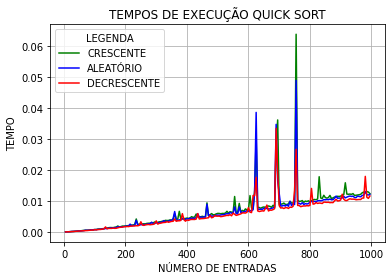

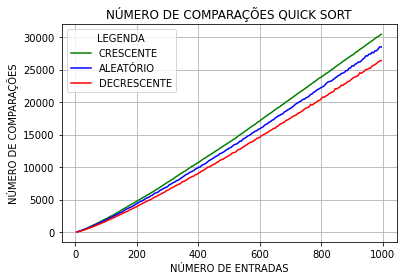

In [69]:
    

timesArrayOrdenadoCrescente = []
timesArrayAleatorio = []
timesArrayOrdenadoDecrescente = []
comparacoesArrayOrdenadoCrescente = []
comparacoesArrayAleatorio = []
comparacoesArrayOrdenadoDecrescente = []
numeroEntradas = []


for i in range(5,1000,5):
        timesArrayOrdenadoCrescente.append(heapSort(numpy.arange(0,i,1))[0])
        timesArrayAleatorio.append(heapSort(numpy.random.randint(0, intervalo, i))[0])
        timesArrayOrdenadoDecrescente.append(heapSort(numpy.arange(i-1,-1,-1))[0])
        comparacoesArrayOrdenadoCrescente.append(heapSort(numpy.arange(0,i,1))[1])
        comparacoesArrayAleatorio.append(heapSort(numpy.random.randint(0, intervalo, i))[1])
        comparacoesArrayOrdenadoDecrescente.append(heapSort(numpy.arange(i-1,-1,-1))[1])
        numeroEntradas.append(i)



plt.title("TEMPOS DE EXECUÇÃO QUICK SORT")
plt.plot(numeroEntradas,timesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,timesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,timesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("TEMPO")
plt.show()


plt.title("NÚMERO DE COMPARAÇÕES QUICK SORT")
plt.plot(numeroEntradas,comparacoesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,comparacoesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,comparacoesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("NÚMERO DE COMPARAÇÕES")
plt.show()